In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt


In [2]:
input_folder = "../E7-images"
output_folder="../output_BB"

C:\Users\Dell\AppData\Local\Temp\ipykernel_43956\2008843037.py:29: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


Bounding boxes superimposed on 0001.jpg and saved as ../output_BB\superimposed_0001.jpg
Bounding boxes superimposed on 0002.jpg and saved as ../output_BB\superimposed_0002.jpg
Bounding boxes superimposed on 0003.jpg and saved as ../output_BB\superimposed_0003.jpg
Bounding boxes superimposed on 0004.jpg and saved as ../output_BB\superimposed_0004.jpg
Bounding boxes superimposed on 0005.jpg and saved as ../output_BB\superimposed_0005.jpg
Bounding boxes superimposed on 0006.jpg and saved as ../output_BB\superimposed_0006.jpg
Bounding boxes superimposed on 0007.jpg and saved as ../output_BB\superimposed_0007.jpg
Bounding boxes superimposed on 0008.jpg and saved as ../output_BB\superimposed_0008.jpg
Bounding boxes superimposed on 0009.jpg and saved as ../output_BB\superimposed_0009.jpg
Bounding boxes superimposed on 0010.jpg and saved as ../output_BB\superimposed_0010.jpg
Bounding boxes superimposed on 0011.jpg and saved as ../output_BB\superimposed_0011.jpg
Bounding boxes superimposed on 0

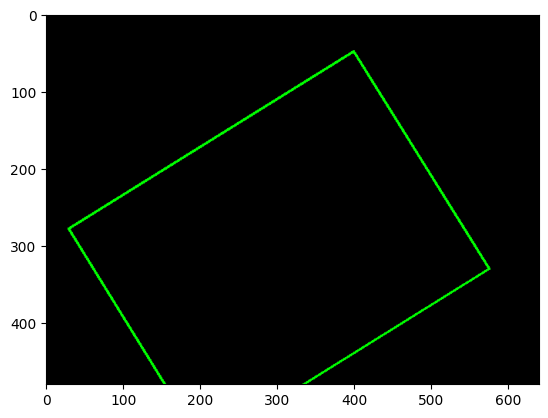

In [3]:
os.makedirs(output_folder, exist_ok=True)

# Getting the list of image files in the input folder
image_files = os.listdir(input_folder)

for image_name in image_files:
    try:
        # Loading the original image
        original_image_path = os.path.join(input_folder, image_name)
        original_image = cv2.imread(original_image_path)

        if original_image is not None:
            # Converting the original image to grayscale
            gray_original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
            # Applying Canny edge detection to detect edges
            edges = cv2.Canny(gray_original_image, 50, 150)
            # Finding contours
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            # Creating a blank canvas of the same size as the original image
            canvas = np.zeros_like(original_image)

            # Drawing minimum area bounding rectangles around contours
            for contour in contours:
                rect = cv2.minAreaRect(contour)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                cv2.drawContours(canvas, [box], 0, (0, 255, 0), 2)
            plt.imshow(canvas)

            # Superimposing the bounding boxes onto the original image
            superimposed_image = cv2.addWeighted(original_image, 0.7, canvas, 0.3, 0)

            # Saving the superimposed image
            output_path = os.path.join(output_folder, 'superimposed_' + image_name)
            cv2.imwrite(output_path, superimposed_image)
            print(f"Bounding boxes superimposed on {image_name} and saved as {output_path}")

        else:
            print(f"Error: Unable to load image {image_name}")

    except Exception as e:
        print(f"An error occurred while processing {image_name}: {e}")

In [4]:
output_folder2="../output_c"
os.makedirs(output_folder2, exist_ok=True)
for image_name in image_files:
    try:
        # Load the original image
        original_image_path = os.path.join(input_folder, image_name)
        original_image = cv2.imread(original_image_path)

        if original_image is not None:
            # Convert the original image to grayscale
            gray_original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

            # Apply Canny edge detection to detect edges
            edges = cv2.Canny(gray_original_image, 50, 150)

            # Find contours
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Create a blank canvas of the same size as the original image
            canvas = np.zeros_like(original_image)
            cv2.drawContours(canvas, contours, -1, (0, 255, 0), 2)
            output_path = os.path.join(output_folder2, 'superimposed_' + image_name)
            cv2.imwrite(output_path, canvas)
            print(f"Bounding boxes superimposed on {image_name} and saved as {output_path}")

        else:
            print(f"Error: Unable to load image {image_name}")

    except Exception as e:
        print(f"An error occurred while processing {image_name}: {e}")


Bounding boxes superimposed on 0001.jpg and saved as ../output_c\superimposed_0001.jpg
Bounding boxes superimposed on 0002.jpg and saved as ../output_c\superimposed_0002.jpg
Bounding boxes superimposed on 0003.jpg and saved as ../output_c\superimposed_0003.jpg
Bounding boxes superimposed on 0004.jpg and saved as ../output_c\superimposed_0004.jpg
Bounding boxes superimposed on 0005.jpg and saved as ../output_c\superimposed_0005.jpg
Bounding boxes superimposed on 0006.jpg and saved as ../output_c\superimposed_0006.jpg
Bounding boxes superimposed on 0007.jpg and saved as ../output_c\superimposed_0007.jpg
Bounding boxes superimposed on 0008.jpg and saved as ../output_c\superimposed_0008.jpg
Bounding boxes superimposed on 0009.jpg and saved as ../output_c\superimposed_0009.jpg
Bounding boxes superimposed on 0010.jpg and saved as ../output_c\superimposed_0010.jpg
Bounding boxes superimposed on 0011.jpg and saved as ../output_c\superimposed_0011.jpg
Bounding boxes superimposed on 0012.jpg and

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
output2=os.listdir(output_folder2)
output2

['superimposed_0001.jpg',
 'superimposed_0002.jpg',
 'superimposed_0003.jpg',
 'superimposed_0004.jpg',
 'superimposed_0005.jpg',
 'superimposed_0006.jpg',
 'superimposed_0007.jpg',
 'superimposed_0008.jpg',
 'superimposed_0009.jpg',
 'superimposed_0010.jpg',
 'superimposed_0011.jpg',
 'superimposed_0012.jpg',
 'superimposed_0013.jpg',
 'superimposed_0014.jpg',
 'superimposed_0015.jpg',
 'superimposed_0016.jpg',
 'superimposed_0017.jpg',
 'superimposed_0018.jpg',
 'superimposed_0019.jpg',
 'superimposed_0020.jpg',
 'superimposed_0021.jpg',
 'superimposed_0022.jpg',
 'superimposed_0023.jpg',
 'superimposed_0024.jpg',
 'superimposed_0025.jpg',
 'superimposed_0026.jpg',
 'superimposed_0027.jpg',
 'superimposed_0028.jpg',
 'superimposed_0029.jpg',
 'superimposed_0030.jpg',
 'superimposed_0031.jpg',
 'superimposed_0032.jpg',
 'superimposed_0033.jpg',
 'superimposed_0034.jpg',
 'superimposed_0035.jpg',
 'superimposed_0036.jpg',
 'superimposed_0037.jpg',
 'superimposed_0038.jpg',
 'superimpos

In [54]:
output2=os.listdir(output_folder2)
shape_features_orig=[]
for image_name in output2:
    try:
        # Load the original image
        original_image_path = os.path.join(output_folder2, image_name)
        original_image = cv2.imread(original_image_path)

        if original_image is not None:
            # Converting the original image to grayscale
            gray_original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

            # Applying Canny edge detection to detect edges
            edges = cv2.Canny(gray_original_image, 50, 150)

            # Finding contours
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            print(contours[0].shape)
            moments = cv2.moments(contours[0])
            hu_moments = cv2.HuMoments(moments).flatten()
            shape_features_orig.append(hu_moments)
    except Exception as e:
        print(f"An error occurred while processing {image_name}: {e}")

(81, 1, 2)
(344, 1, 2)
(521, 1, 2)
(409, 1, 2)
(121, 1, 2)
(358, 1, 2)
(242, 1, 2)
(403, 1, 2)
(552, 1, 2)
(255, 1, 2)
(199, 1, 2)
(229, 1, 2)
(278, 1, 2)
(235, 1, 2)
(196, 1, 2)
(401, 1, 2)
(480, 1, 2)
(121, 1, 2)
(435, 1, 2)
(91, 1, 2)
(678, 1, 2)
(687, 1, 2)
(241, 1, 2)
(379, 1, 2)
(549, 1, 2)
(499, 1, 2)
(687, 1, 2)
(264, 1, 2)
(75, 1, 2)
(50, 1, 2)
(592, 1, 2)
(34, 1, 2)
(99, 1, 2)
(168, 1, 2)
(112, 1, 2)
(423, 1, 2)
(41, 1, 2)
(491, 1, 2)
(57, 1, 2)
(460, 1, 2)
(252, 1, 2)
(617, 1, 2)
(491, 1, 2)
(660, 1, 2)
(453, 1, 2)
(468, 1, 2)
(234, 1, 2)
(354, 1, 2)
(121, 1, 2)
(75, 1, 2)
(300, 1, 2)
(451, 1, 2)
(560, 1, 2)
(255, 1, 2)
(242, 1, 2)
(243, 1, 2)
(119, 1, 2)
(57, 1, 2)
(74, 1, 2)
(359, 1, 2)
(379, 1, 2)
(104, 1, 2)
(468, 1, 2)
(468, 1, 2)
(514, 1, 2)
(65, 1, 2)
(122, 1, 2)
(448, 1, 2)
(253, 1, 2)
(253, 1, 2)
(344, 1, 2)
(177, 1, 2)
(514, 1, 2)
(46, 1, 2)
(67, 1, 2)
(190, 1, 2)
(180, 1, 2)
(678, 1, 2)
(403, 1, 2)
(242, 1, 2)
(295, 1, 2)
(560, 1, 2)
(234, 1, 2)
(354, 1, 2)
(34, 1

In [55]:
shape_features

array([[ 1.67170707e-01,  1.98639863e-03,  6.36544706e-05, ...,
         2.50307333e-12,  1.47938004e-08, -9.28026518e-12],
       [ 1.67999145e-01,  1.96876060e-03,  6.11792093e-05, ...,
        -1.38498747e-11, -1.76271850e-08, -2.27138176e-11],
       [ 1.69449134e-01,  1.91507559e-03,  4.00174908e-04, ...,
         2.67058745e-10,  2.17705425e-07, -3.13306464e-10],
       ...,
       [ 2.43370563e-01,  2.21801505e-02,  8.08506013e-04, ...,
         2.05970232e-08,  6.28073787e-06, -1.53468553e-08],
       [ 2.58954823e-01,  2.50679853e-02,  1.06819939e-03, ...,
         1.37767586e-09, -1.18540467e-05, -2.51940700e-08],
       [ 2.61822908e-01,  2.75814288e-02,  1.82687133e-03, ...,
         9.27257841e-08, -3.20111704e-05,  1.54426999e-07]])

In [56]:
shape_features_orig = np.array(shape_features_orig)

In [57]:
shape_features_orig.shape

(1183, 7)

In [58]:
shape_features = np.unique(shape_features_orig, axis=0)

In [59]:
shape_features.shape

(173, 7)

In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram

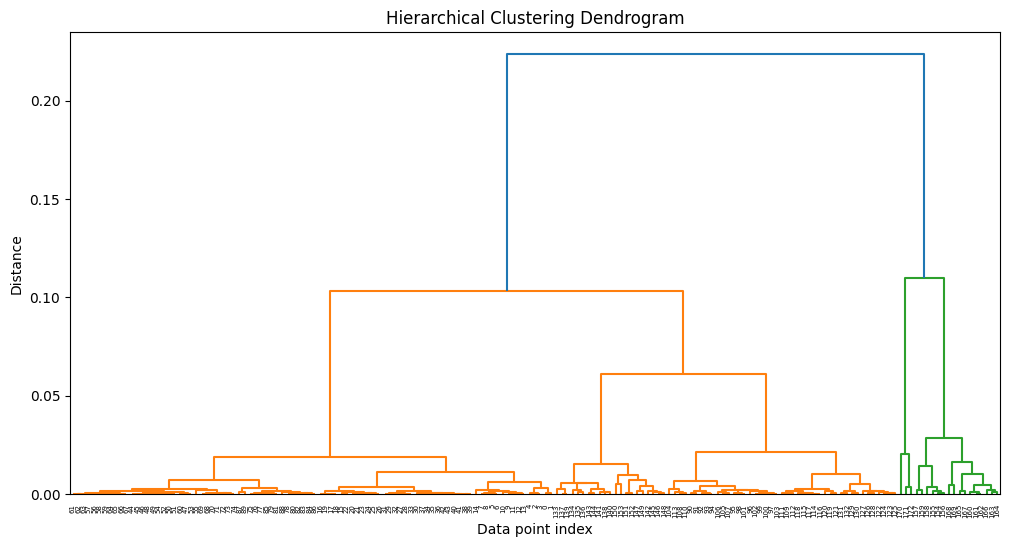

In [61]:
linkage_matrix = linkage(shape_features, method='ward')  # 'ward' linkage minimizes variance when forming clusters

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score

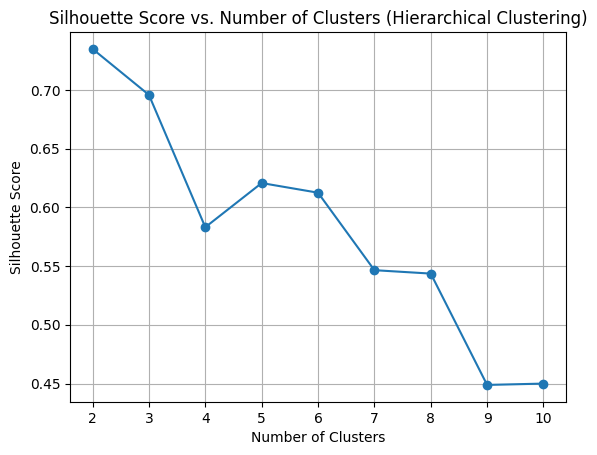

In [63]:
min_clusters = 2
max_clusters = 10

# Initialize lists to store silhouette scores and number of clusters
silhouette_scores = []
num_clusters_list = list(range(min_clusters, max_clusters + 1))

# Iterate over each number of clusters
for num_clusters in num_clusters_list:
    # Calculate linkage matrix
    linkage_matrix = linkage(shape_features, method='ward')
    
    # Perform hierarchical clustering
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(shape_features, clusters)
    
    # Append silhouette score to list
    silhouette_scores.append(silhouette_avg)

# Plot silhouette score vs. number of clusters
plt.plot(num_clusters_list, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Hierarchical Clustering)')
plt.grid(True)
plt.show()

In [64]:
from scipy.cluster.hierarchy import fcluster

# Prune the hierarchical clustering tree to obtain a fixed number of clusters
num_clusters = 9  # You can adjust this number as needed
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Print the cluster labels
print("Cluster Labels:", clusters)

Cluster Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4
 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 7 6 6]


In [65]:
# Visualizing 
cluster_1_indices = [i for i, cluster_label in enumerate(clusters) if cluster_label == 1]
cluster_1_image_files = [image_files[i] for i in cluster_1_indices]

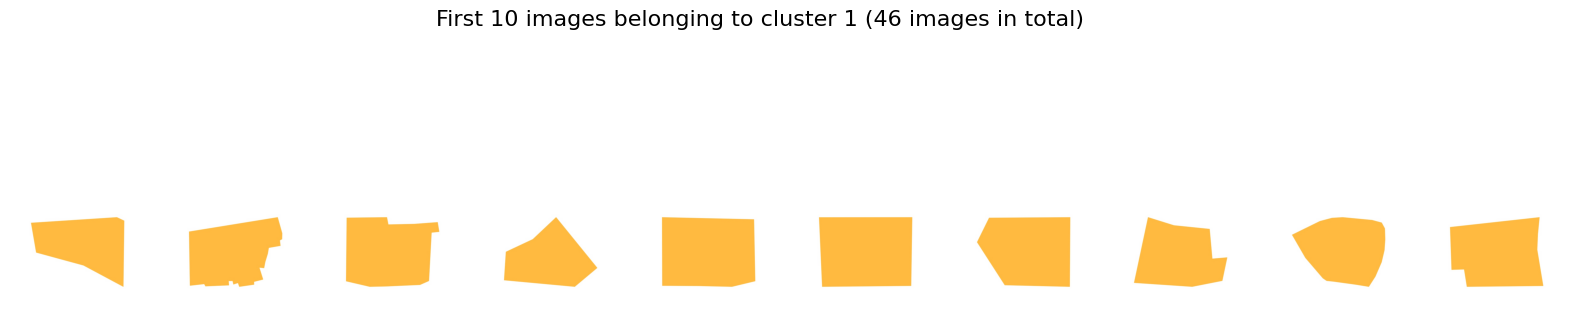

In [66]:
num_images_to_display = min(10, len(cluster_1_image_files))
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))

for i in range(num_images_to_display):
    image_path = os.path.join(input_folder, cluster_1_image_files[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display with Matplotlib
    axes[i].imshow(image)
    axes[i].axis('off')

plt.suptitle(f"First {num_images_to_display} images belonging to cluster 1 ({len(cluster_1_image_files)} images in total)", fontsize=16)
plt.show()

In [67]:
cluster_8_indices = [i for i, cluster_label in enumerate(clusters) if cluster_label == 8]
cluster_8_image_files = [image_files[i] for i in cluster_8_indices]

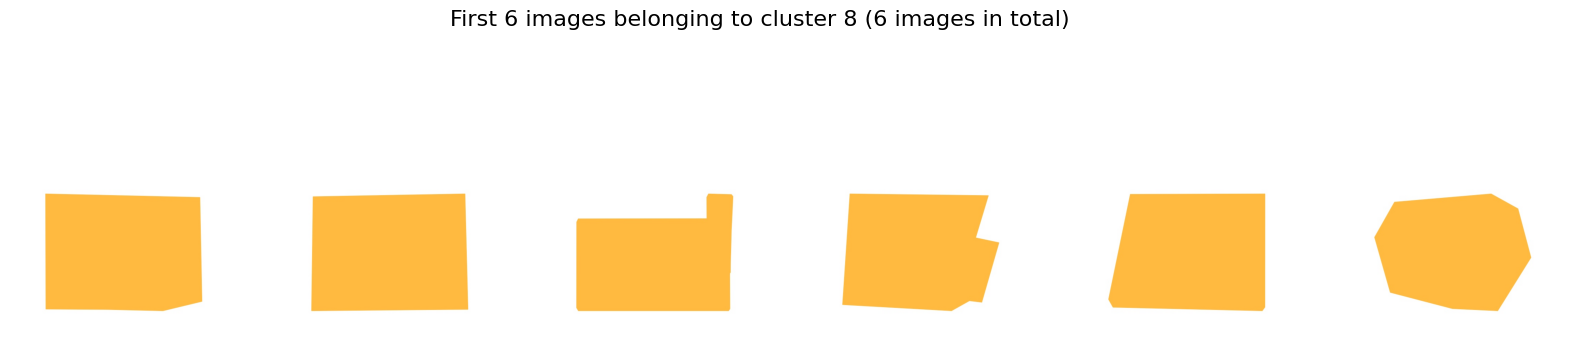

In [68]:
num_images_to_display = min(10, len(cluster_8_image_files))
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))

for i in range(num_images_to_display):
    image_path = os.path.join(input_folder, cluster_8_image_files[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display with Matplotlib
    axes[i].imshow(image)
    axes[i].axis('off')

plt.suptitle(f"First {num_images_to_display} images belonging to cluster 8 ({len(cluster_8_image_files)} images in total)", fontsize=16)
plt.show()

#### k-means clustering

In [69]:
from sklearn.cluster import KMeans

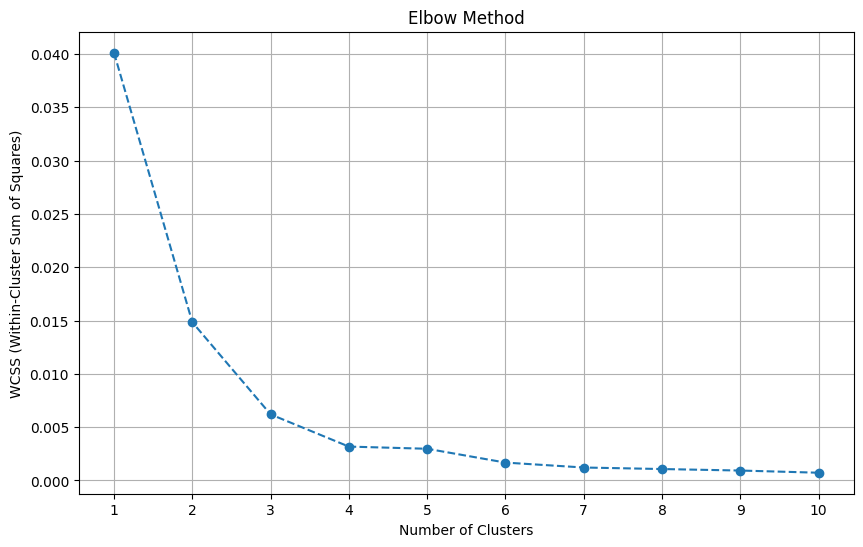

In [70]:
shape_features_array = np.array(shape_features)

# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares

# Test different values of K
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_model.fit(shape_features_array)
    wcss.append(kmeans_model.inertia_)  # Inertia is the within-cluster sum of squares

# Plot the Elbow Method curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#### from graph optimal cluster = 4

In [71]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import pairwise_distances

In [72]:
# # Create a Spectral Clustering model
# spectral_model = SpectralClustering(affinity='nearest_neighbors', random_state=653)

# # Fit the model to the shape features
# spectral_clusters = spectral_model.fit_predict(shape_features_array)

# # Print the number of clusters found by Spectral Clustering
# num_clusters_spectral = len(set(spectral_clusters))
# print("Number of clusters for Spectral Clustering:", num_clusters_spectral)


Spectral Clustering does not directly use a k-nearest neighbors (KNN) graph as part of its optimization process. Instead, Spectral Clustering operates on an affinity matrix, which represents pairwise similarities or affinities between data points.

Spectral Clustering can use various methods to construct the affinity matrix, such as:

K-nearest neighbors (KNN) graph: The affinity between two data points is determined by their proximity in feature space, typically measured using Euclidean distance. A KNN graph is constructed, where each data point is connected to its k nearest neighbors.

Gaussian kernel: The affinity between two data points is determined by the Gaussian similarity function, which assigns higher similarity to nearby points and lower similarity to distant points. This results in a dense affinity matrix.

Full pairwise similarity: The affinity matrix can be directly computed based on pairwise similarities between all data points, using similarity measures like cosine similarity or correlation.

Once the affinity matrix is constructed, Spectral Clustering proceeds with eigen decomposition or singular value decomposition of the Laplacian matrix derived from the affinity matrix. This process reveals the low-dimensional embedding of the data points, where clustering is performed using a standard clustering algorithm (such as K-Means) on the spectral embedding space.

While Spectral Clustering itself does not have a cost function to optimize, the choice of affinity matrix construction method can impact the clustering results. The plot of negative eigenvalues, as mentioned earlier, provides insights into the spectral embedding quality and can help in assessing the clustering performance.

In [73]:
# k = 10  # number of nearest neighbors
# knn_graph = kneighbors_graph(shape_features_array, n_neighbors=k, mode='connectivity', include_self=False)
# similarity_matrix = 0.5 * (knn_graph + knn_graph.T)

# # Compute the pairwise distances between data points
# distances = pairwise_distances(shape_features_array)

# # Create a list to store the negative eigenvalues
# negative_eigenvalues = []

# # Iterate over a range of possible number of clusters
# max_clusters = 10
# for n_clusters in range(2, max_clusters + 1):
#     # Create a Spectral Clustering model
#     spectral_model = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=653)

#     # Fit the model to the affinity matrix
#     spectral_clusters = spectral_model.fit_predict(similarity_matrix)

#     # Compute the degree matrix
#     degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))

#     # Compute the Laplacian matrix
#     laplacian_matrix = degree_matrix - similarity_matrix

#     # Perform eigen decomposition of the Laplacian matrix
#     eigenvalues, _ = np.linalg.eigh(laplacian_matrix)

#     # Count the number of negative eigenvalues
#     num_negative_eigenvalues = np.sum(eigenvalues < 0)

#     # Append the number of negative eigenvalues to the list
#     negative_eigenvalues.append(num_negative_eigenvalues)

# # Plot the negative eigenvalues
# plt.figure(figsize=(10, 6))
# plt.plot(range(2, max_clusters + 1), negative_eigenvalues, marker='o', linestyle='-')
# plt.title('Number of Negative Eigenvalues vs. Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Number of Negative Eigenvalues')
# plt.grid(True)
# plt.show()

In [74]:
silhouette_scores = []

# Define a range of cluster numbers to try
cluster_range = range(2, 20)  # You can adjust the range as needed

# Iterate over each cluster number
for n_clusters in cluster_range:
    # Create a Spectral Clustering model
    spectral_model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=653)

    # Fit the model to the data
    spectral_clusters = spectral_model.fit_predict(shape_features_array)

    # Compute the silhouette score
    silhouette_avg = silhouette_score(shape_features_array, spectral_clusters)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters with the maximum silhouette score
optimal_num_clusters = cluster_range[np.argmax(silhouette_scores)]
max_silhouette_score = max(silhouette_scores)

print("Optimal number of clusters:", optimal_num_clusters)
print("Maximum silhouette score:", max_silhouette_score)

Optimal number of clusters: 2
Maximum silhouette score: 0.4638040392524744


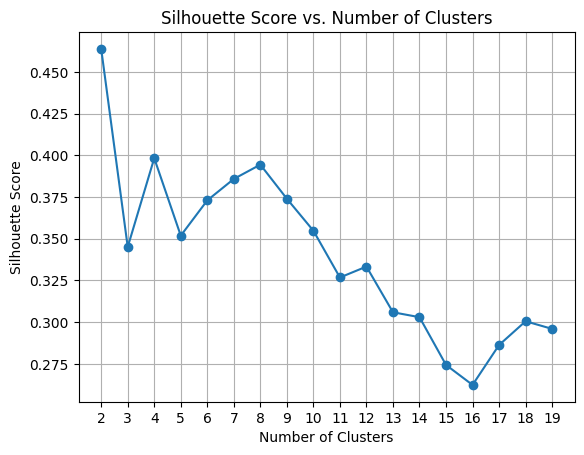

In [75]:
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(range(min(cluster_range), max(cluster_range) + 1, 1))
plt.grid(True)
plt.show()

#### storing the unique images

In [79]:
import shutil

input_folder = '../E7-images'
output_directory = "../unique_images"
os.makedirs(output_directory, exist_ok=True)

# Get the indices of unique images in shape_features_orig
unique_indices = np.unique(shape_features_orig, axis=0, return_index=True)[1]

# Iterate over the unique indices and copy corresponding images to the new directory
for index in unique_indices:
    # Get the filename of the corresponding image
    image_name = "{:04d}.jpg".format(index + 1)
    
    # Copy the image to the new directory
    source_path = os.path.join(input_folder, image_name)
    destination_path = os.path.join(output_directory, image_name)
    shutil.copyfile(source_path, destination_path)
    
    print(f"Image '{image_name}' copied to '{output_directory}'.")

print("All unique images have been copied to the new directory.")

Image '0131.jpg' copied to '../unique_images'.
Image '0102.jpg' copied to '../unique_images'.
Image '0053.jpg' copied to '../unique_images'.
Image '0009.jpg' copied to '../unique_images'.
Image '0006.jpg' copied to '../unique_images'.
Image '0002.jpg' copied to '../unique_images'.
Image '0014.jpg' copied to '../unique_images'.
Image '0051.jpg' copied to '../unique_images'.
Image '0315.jpg' copied to '../unique_images'.
Image '0012.jpg' copied to '../unique_images'.
Image '0129.jpg' copied to '../unique_images'.
Image '0113.jpg' copied to '../unique_images'.
Image '0016.jpg' copied to '../unique_images'.
Image '0382.jpg' copied to '../unique_images'.
Image '0035.jpg' copied to '../unique_images'.
Image '0034.jpg' copied to '../unique_images'.
Image '0233.jpg' copied to '../unique_images'.
Image '0236.jpg' copied to '../unique_images'.
Image '0011.jpg' copied to '../unique_images'.
Image '0028.jpg' copied to '../unique_images'.
Image '0403.jpg' copied to '../unique_images'.
Image '0074.j

#### Q2

In [80]:
import cv2
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [81]:
# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define a function to perform object detection and form bounding boxes
def detect_blueprints(image_path):
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = transforms.ToTensor()(image_rgb)
    image_tensor = image_tensor.unsqueeze(0)  # Add a batch dimension

    # Perform inference
    with torch.no_grad():
        predictions = model(image_tensor)

    # Extract bounding boxes and scores
    boxes = predictions[0]['boxes'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Filter out boxes with low confidence scores
    threshold = 0.5
    filtered_boxes = boxes[scores >= threshold]

    return filtered_boxes

# Define a function to calculate the area of bounding boxes
def calculate_bounding_box_area(bounding_boxes):
    areas = []
    for box in bounding_boxes:
        # Calculate width and height of bounding box
        width = box[2] - box[0]
        height = box[3] - box[1]
        # Calculate area of bounding box
        area = width * height
        areas.append(area)
    return areas

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [82]:
def process_blueprints(image_paths):
    blueprint_areas = {}
    for image_path in image_paths:
        # Detect blueprints and form bounding boxes
        bounding_boxes = detect_blueprints(image_path)
        # Calculate areas of bounding boxes
        areas = calculate_bounding_box_area(bounding_boxes)
        # Sum the areas of all bounding boxes for this image
        total_area = sum(areas)
        # Store the total area for this image
        blueprint_areas[image_path] = total_area
    return blueprint_areas

In [83]:
folder_path = '../unique_images'

# List all files in the image folder
image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".jpg") or file.endswith(".png")]

# Process blueprint images and calculate areas
blueprint_areas = process_blueprints(image_paths)

# Print the calculated areas for each image
for image_path, area in blueprint_areas.items():
    print(f"Blueprint image: {image_path}, Total area: {area} square pixels")

Blueprint image: ../unique_images\0001.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0002.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0003.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0004.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0005.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0006.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0007.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0008.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0009.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0010.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0011.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0012.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0013.jpg, Total area: 0 square pixels
Blueprint image: ../unique_images\0014.jpg, Total area: 0 square

In [91]:
input_folder_new = "../unique_images"
output_folder_new ="../out_BB"

C:\Users\Dell\AppData\Local\Temp\ipykernel_43956\1490082659.py:29: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


Bounding boxes superimposed on 0001.jpg and saved as ../out_BB\superimposed_0001.jpg
Bounding boxes superimposed on 0002.jpg and saved as ../out_BB\superimposed_0002.jpg
Bounding boxes superimposed on 0003.jpg and saved as ../out_BB\superimposed_0003.jpg
Bounding boxes superimposed on 0004.jpg and saved as ../out_BB\superimposed_0004.jpg
Bounding boxes superimposed on 0005.jpg and saved as ../out_BB\superimposed_0005.jpg
Bounding boxes superimposed on 0006.jpg and saved as ../out_BB\superimposed_0006.jpg
Bounding boxes superimposed on 0007.jpg and saved as ../out_BB\superimposed_0007.jpg
Bounding boxes superimposed on 0008.jpg and saved as ../out_BB\superimposed_0008.jpg
Bounding boxes superimposed on 0009.jpg and saved as ../out_BB\superimposed_0009.jpg
Bounding boxes superimposed on 0010.jpg and saved as ../out_BB\superimposed_0010.jpg
Bounding boxes superimposed on 0011.jpg and saved as ../out_BB\superimposed_0011.jpg
Bounding boxes superimposed on 0012.jpg and saved as ../out_BB\su

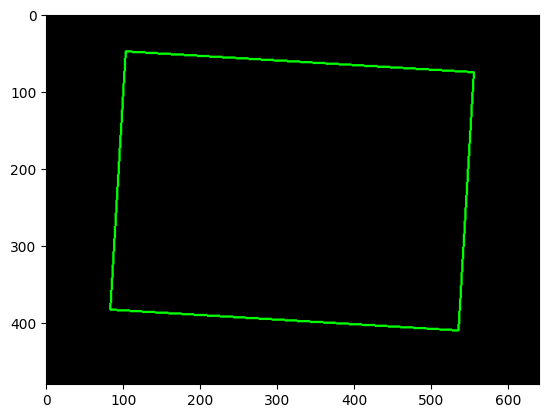

In [93]:
os.makedirs(output_folder_new, exist_ok=True)

# Get a list of image files in the input folder
image_files = os.listdir(input_folder_new)

for image_name in image_files:
    try:
        # Load the original image
        original_image_path = os.path.join(input_folder_new, image_name)
        original_image = cv2.imread(original_image_path)

        if original_image is not None:
            # Convert the original image to grayscale
            gray_original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

            # Apply Canny edge detection to detect edges
            edges = cv2.Canny(gray_original_image, 50, 150)

            # Find contours
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Create a blank canvas of the same size as the original image
            canvas = np.zeros_like(original_image)

            # Draw minimum area bounding rectangles around contours
            for contour in contours:
                rect = cv2.minAreaRect(contour)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                cv2.drawContours(canvas, [box], 0, (0, 255, 0), 2)
            plt.imshow(canvas)

            # Superimpose the bounding boxes onto the original image
            superimposed_image = cv2.addWeighted(original_image, 0.7, canvas, 0.3, 0)

            # Save the superimposed image
            output_path = os.path.join(output_folder_new, 'superimposed_' + image_name)
            cv2.imwrite(output_path, superimposed_image)
            print(f"Bounding boxes superimposed on {image_name} and saved as {output_path}")

        else:
            print(f"Error: Unable to load image {image_name}")

    except Exception as e:
        print(f"An error occurred while processing {image_name}: {e}")

In [94]:
output_folder2_new ="../out_contour"
os.makedirs(output_folder2_new, exist_ok=True)
for image_name in image_files:
    try:
        # Load the original image
        original_image_path = os.path.join(input_folder_new, image_name)
        original_image = cv2.imread(original_image_path)

        if original_image is not None:
            # Convert the original image to grayscale
            gray_original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

            # Apply Canny edge detection to detect edges
            edges = cv2.Canny(gray_original_image, 50, 150)

            # Find contours
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Create a blank canvas of the same size as the original image
            canvas = np.zeros_like(original_image)
            cv2.drawContours(canvas, contours, -1, (0, 255, 0), 2)
            output_path = os.path.join(output_folder2_new, 'superimposed_' + image_name)
            cv2.imwrite(output_path, canvas)
            print(f"Bounding boxes superimposed on {image_name} and saved as {output_path}")

        else:
            print(f"Error: Unable to load image {image_name}")

    except Exception as e:
        print(f"An error occurred while processing {image_name}: {e}")


Bounding boxes superimposed on 0001.jpg and saved as ../out_contour\superimposed_0001.jpg
Bounding boxes superimposed on 0002.jpg and saved as ../out_contour\superimposed_0002.jpg
Bounding boxes superimposed on 0003.jpg and saved as ../out_contour\superimposed_0003.jpg
Bounding boxes superimposed on 0004.jpg and saved as ../out_contour\superimposed_0004.jpg
Bounding boxes superimposed on 0005.jpg and saved as ../out_contour\superimposed_0005.jpg
Bounding boxes superimposed on 0006.jpg and saved as ../out_contour\superimposed_0006.jpg
Bounding boxes superimposed on 0007.jpg and saved as ../out_contour\superimposed_0007.jpg
Bounding boxes superimposed on 0008.jpg and saved as ../out_contour\superimposed_0008.jpg
Bounding boxes superimposed on 0009.jpg and saved as ../out_contour\superimposed_0009.jpg
Bounding boxes superimposed on 0010.jpg and saved as ../out_contour\superimposed_0010.jpg
Bounding boxes superimposed on 0011.jpg and saved as ../out_contour\superimposed_0011.jpg
Bounding b

In [95]:
# Function to calculate area of a contour
def calculate_contour_area(contour):
    return cv2.contourArea(contour)

# Function to detect edges of a contour
def detect_contour_edges(contour):
    # Create a blank canvas
    canvas = np.zeros((500, 500), dtype=np.uint8)
    # Draw contour on the canvas
    cv2.drawContours(canvas, [contour], -1, 255, 1)
    # Find edges using Canny edge detection
    edges = cv2.Canny(canvas, 50, 150)
    return edges

# Function to count vertices of a contour
def count_contour_vertices(contour):
    # Approximate the contour to reduce the number of points
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    # Count the number of vertices
    num_vertices = len(approx)
    return num_vertices

In [126]:
# Directory containing the contours
contour_directory = "../out_contour"

# Get a list of contour files in the directory
contour_files = os.listdir(contour_directory)

# Loop through each contour file
for contour_file in contour_files:
    # Load contour
    contour_path = os.path.join(contour_directory, contour_file)
    contour = cv2.imread(contour_path, cv2.IMREAD_GRAYSCALE)
    
    # Find contours in the image
    contours, _ = cv2.findContours(contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Select the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Calculate area of the largest contour
    contour_area = calculate_contour_area(largest_contour)
    
    # Detect edges of the largest contour
    contour_edges = detect_contour_edges(largest_contour)
    
    # Count vertices of the largest contour
    contour_vertices = count_contour_vertices(largest_contour)
    
    # Print results
    print(f"Contour: {contour_file}")
    print("Contour Area:", contour_area)
    print("Number of Contour Vertices:", contour_vertices)
    print("-----------------------------------")

Contour: superimposed_0001.jpg
Contour Area: 137254.0
Number of Contour Vertices: 6
-----------------------------------
Contour: superimposed_0002.jpg
Contour Area: 133911.0
Number of Contour Vertices: 4
-----------------------------------
Contour: superimposed_0003.jpg
Contour Area: 111155.0
Number of Contour Vertices: 5
-----------------------------------
Contour: superimposed_0004.jpg
Contour Area: 104168.0
Number of Contour Vertices: 4
-----------------------------------
Contour: superimposed_0005.jpg
Contour Area: 149808.0
Number of Contour Vertices: 4
-----------------------------------
Contour: superimposed_0006.jpg
Contour Area: 134980.0
Number of Contour Vertices: 4
-----------------------------------
Contour: superimposed_0007.jpg
Contour Area: 139288.0
Number of Contour Vertices: 6
-----------------------------------
Contour: superimposed_0008.jpg
Contour Area: 108377.5
Number of Contour Vertices: 4
-----------------------------------
Contour: superimposed_0009.jpg
Contour A

In [127]:
contour_data = []

# Loop through each contour file
for contour_file in contour_files:
    # Load contour
    contour_path = os.path.join(contour_directory, contour_file)
    contour = cv2.imread(contour_path, cv2.IMREAD_GRAYSCALE)
    
    # Find contours in the image
    contours, _ = cv2.findContours(contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Select the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Calculate area of the largest contour
    contour_area = calculate_contour_area(largest_contour)
    
    # Count vertices of the largest contour
    contour_vertices = count_contour_vertices(largest_contour)
    
    # Calculate feature value: number of vertices / total area
    feature_value = contour_vertices / contour_area
    
    # Append data to list
    contour_data.append({'Contour File': contour_file, 'Contour Area': contour_area, 
                         'Number of Vertices': contour_vertices, 'Feature Value': feature_value})


In [167]:
contour_df

,Contour File,Contour Area,Number of Vertices,Feature Value,Complexity
0,superimposed_0001.jpg,137254.0,6,0.000044,Medium Complexity
1,superimposed_0002.jpg,133911.0,4,0.000030,Medium Complexity
2,superimposed_0003.jpg,111155.0,5,0.000045,High Complexity
3,superimposed_0004.jpg,104168.0,4,0.000038,Medium Complexity
4,superimposed_0005.jpg,149808.0,4,0.000027,Low Complexity
...,...,...,...,...,...
168,superimposed_0971.jpg,102599.0,4,0.000039,Medium Complexity
169,superimposed_1013.jpg,102875.5,5,0.000049,High Complexity
170,superimposed_1015.jpg,113715.5,6,0.000053,High Complexity
171,superimposed_1043.jpg,146604.0,4,0.000027,Low Complexity


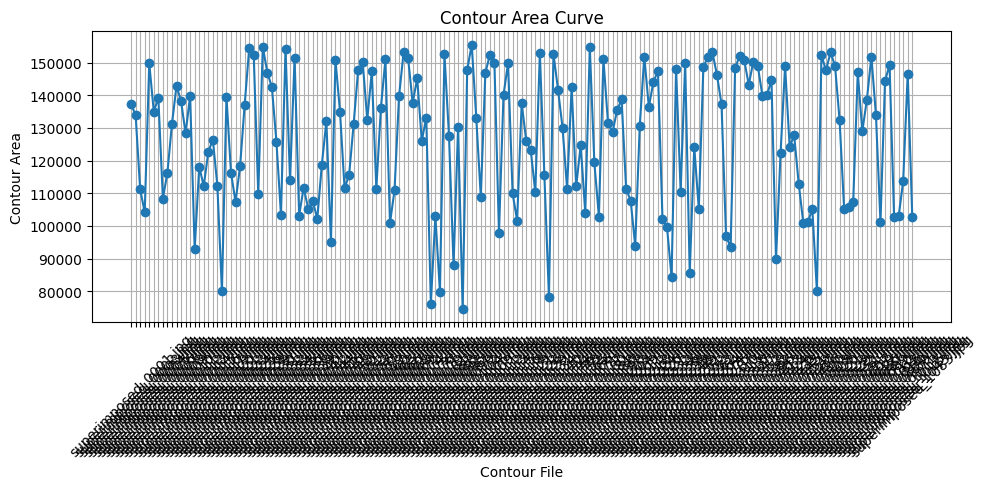

In [168]:
# Plotting the area curve
plt.figure(figsize=(10, 5))
plt.plot(contour_df['Contour File'], contour_df['Contour Area'], marker='o', linestyle='-')
plt.title('Contour Area Curve')
plt.xlabel('Contour File')
plt.ylabel('Contour Area')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

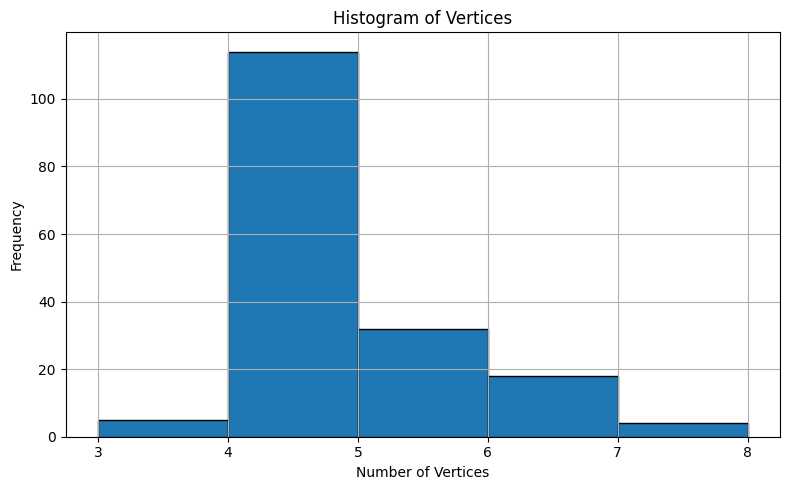

In [170]:
# Plotting the histogram of vertices
plt.figure(figsize=(8, 5))
plt.hist(contour_df['Number of Vertices'], bins=range(min(contour_df['Number of Vertices']), max(contour_df['Number of Vertices']) + 1), edgecolor='black')
plt.title('Histogram of Vertices')
plt.xlabel('Number of Vertices')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

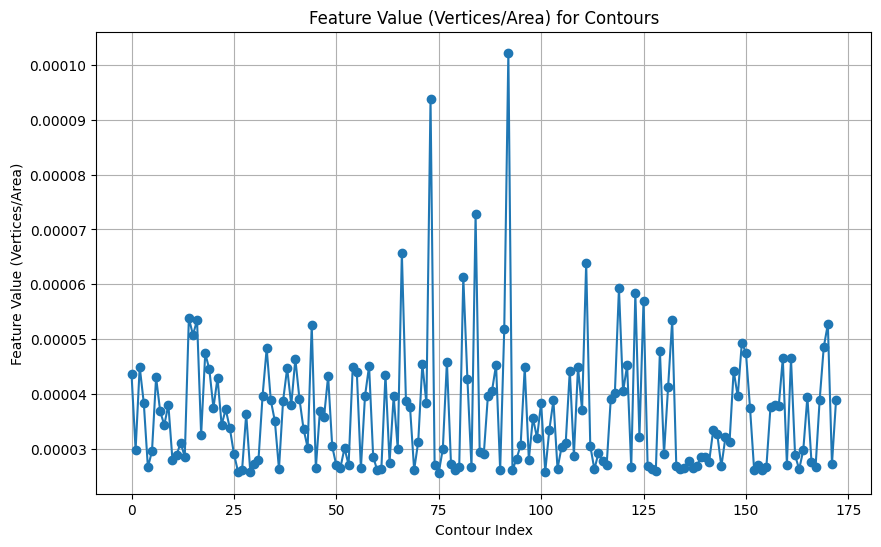

              Contour File  Contour Area  Number of Vertices  Feature Value
0    superimposed_0001.jpg      137254.0                   6       0.000044
1    superimposed_0002.jpg      133911.0                   4       0.000030
2    superimposed_0003.jpg      111155.0                   5       0.000045
3    superimposed_0004.jpg      104168.0                   4       0.000038
4    superimposed_0005.jpg      149808.0                   4       0.000027
..                     ...           ...                 ...            ...
168  superimposed_0971.jpg      102599.0                   4       0.000039
169  superimposed_1013.jpg      102875.5                   5       0.000049
170  superimposed_1015.jpg      113715.5                   6       0.000053
171  superimposed_1043.jpg      146604.0                   4       0.000027
172  superimposed_1083.jpg      102718.5                   4       0.000039

[173 rows x 4 columns]


In [128]:
# Create DataFrame
contour_df = pd.DataFrame(contour_data)

# Plot feature value for all contours
plt.figure(figsize=(10, 6))
plt.plot(contour_df['Feature Value'], marker='o', linestyle='-')
plt.title('Feature Value (Vertices/Area) for Contours')
plt.xlabel('Contour Index')
plt.ylabel('Feature Value (Vertices/Area)')
plt.grid(True)
plt.show()

# Display DataFrame
print(contour_df)

In [142]:
np.max(contour_df['Contour Area'])

155531.5

In [143]:
np.min(contour_df['Contour Area'])

74662.5

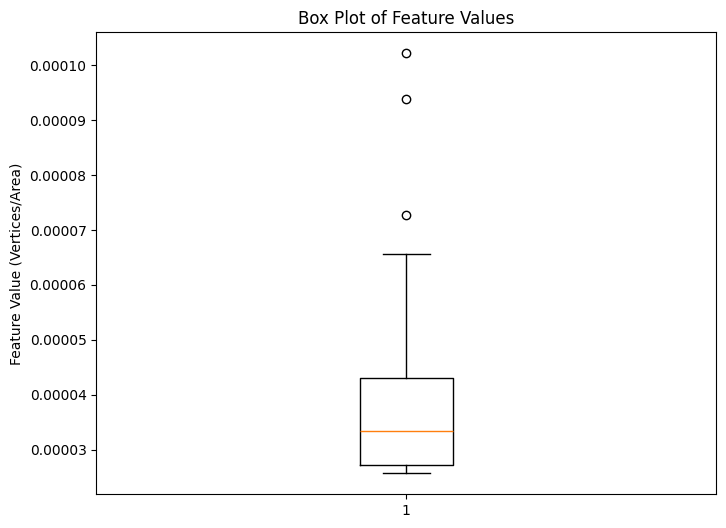

In [129]:
plt.figure(figsize=(8, 6))
plt.boxplot(contour_df['Feature Value'])
plt.title('Box Plot of Feature Values')
plt.ylabel('Feature Value (Vertices/Area)')
plt.show()

In [130]:
percentiles = [25, 50, 75, 90, 95, 99]
percentile_values = np.percentile(contour_df['Feature Value'], percentiles)

# Count number of images within each percentile region
images_in_percentile_region = {}
for i in range(len(percentiles) - 1):
    lower_bound = percentile_values[i]
    upper_bound = percentile_values[i + 1]
    images_in_percentile_region[f'{percentiles[i]}th to {percentiles[i+1]}th percentile'] = \
        contour_df[(contour_df['Feature Value'] >= lower_bound) & (contour_df['Feature Value'] < upper_bound)].shape[0]

# Print number of images within each percentile region
print("Number of Images within Each Percentile Region:")
for region, count in images_in_percentile_region.items():
    print(f"{region}: {count} images")

Number of Images within Each Percentile Region:
25th to 50th percentile: 43 images
50th to 75th percentile: 43 images
75th to 90th percentile: 26 images
90th to 95th percentile: 9 images
95th to 99th percentile: 7 images


### that means 0 to 25 has 45 images

In [131]:
# Calculate thresholds for classifying images into complexity levels
low_threshold = np.percentile(contour_df['Feature Value'], 35)
medium_threshold = np.percentile(contour_df['Feature Value'], 80)

# Classify images based on feature values
def classify_complexity(feature_value):
    if feature_value >= medium_threshold:
        return 'High Complexity'
    elif feature_value >= low_threshold:
        return 'Medium Complexity'
    else:
        return 'Low Complexity'

# Add complexity classification to DataFrame
contour_df['Complexity'] = contour_df['Feature Value'].apply(classify_complexity)

# Print number of images in each complexity level
print("Number of Images in Each Complexity Level:")
print(contour_df['Complexity'].value_counts())


Number of Images in Each Complexity Level:
Complexity
Medium Complexity    77
Low Complexity       61
High Complexity      35
Name: count, dtype: int64


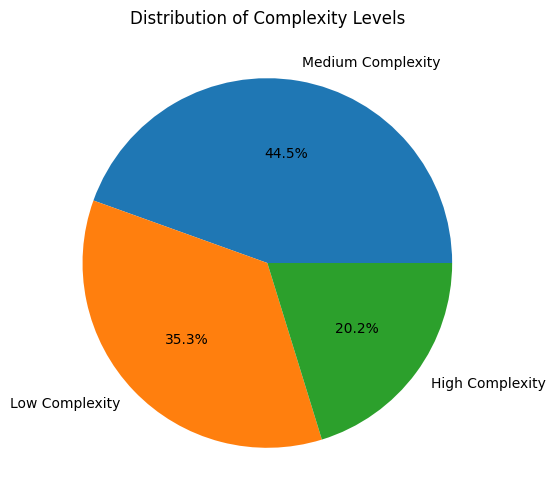

In [166]:
complexity_counts = contour_df['Complexity'].value_counts()

# Plot pie chart for all complexity levels
plt.figure(figsize=(8, 6))
plt.pie(complexity_counts, labels=complexity_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Complexity Levels')
plt.show()

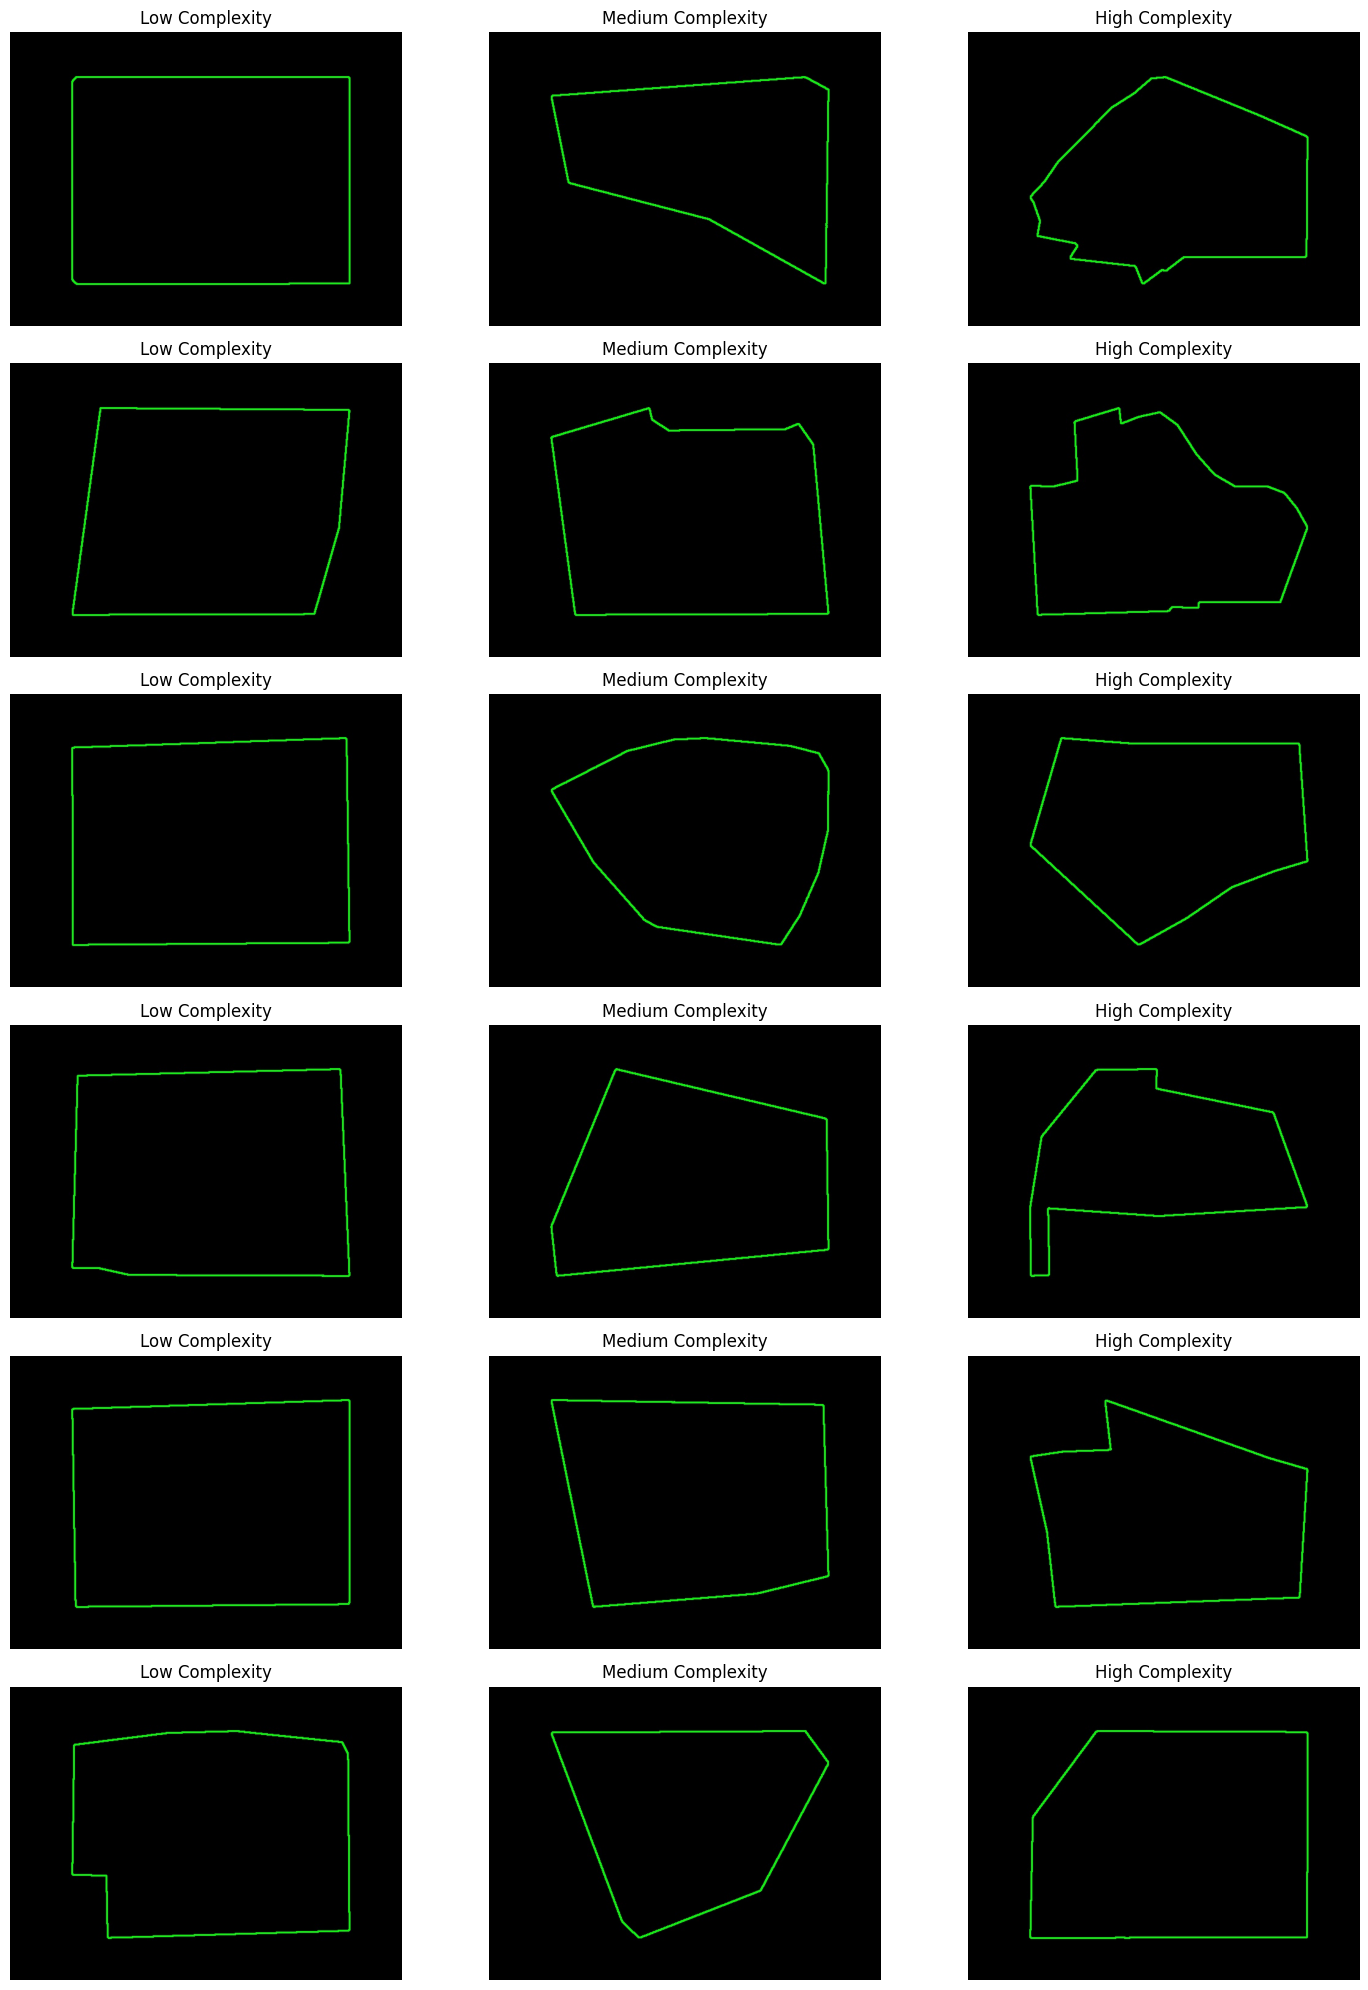

In [132]:
import random

# Create subplots for each complexity class
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Create a dictionary to store images for each complexity class
images_by_complexity = {'Low Complexity': [], 'Medium Complexity': [], 'High Complexity': []}

# Iterate over DataFrame and group images by complexity class
for _, row in contour_df.iterrows():
    complexity = row['Complexity']
    image_path = os.path.join(contour_directory, row['Contour File'])
    image = cv2.imread(image_path)
    images_by_complexity[complexity].append(image)

# Randomly select 5 to 6 images for each complexity class
for i, (complexity, images) in enumerate(images_by_complexity.items()):
    random_images = random.sample(images, min(6, len(images)))
    for j, image in enumerate(random_images):
        axes[j, i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[j, i].set_title(complexity)
        axes[j, i].axis('off')

# Hide empty subplots
for ax in axes.flat[len(images_by_complexity):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### method 2

In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from sklearn.cluster import KMeans
from joblib import parallel_backend

In [134]:
def extract_features_vgg19(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

In [135]:
vgg19_model = VGG19(weights='imagenet', include_top=False, pooling='avg')

In [136]:
folder_path = input_folder_new
features = []
file_paths = []
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        file_paths.append(os.path.join(folder_path, filename))
        features.append(extract_features_vgg19(vgg19_model, os.path.join(folder_path, filename)))



1/1 [==============================] - 0s 87ms/step


In [137]:
from sklearn.cluster import AgglomerativeClustering

X = np.array(features)

agglomerative_cluster = AgglomerativeClustering(n_clusters=3)

with parallel_backend('threading'):
    clusters = agglomerative_cluster.fit_predict(X)


In [138]:
low_complexity = []
medium_complexity = []
high_complexity = []

for i, cluster in enumerate(clusters):
    if cluster == 0:
        low_complexity.append(file_paths[i])
    elif cluster == 1:
        medium_complexity.append(file_paths[i])
    else:
        high_complexity.append(file_paths[i])

# Print the results
print("Low Complexity Images:")
print(low_complexity)
print("\nMedium Complexity Images:")
print(medium_complexity)
print("\nHigh Complexity Images:")
print(high_complexity)

Low Complexity Images:
['../unique_images\\0001.jpg', '../unique_images\\0005.jpg', '../unique_images\\0007.jpg', '../unique_images\\0011.jpg', '../unique_images\\0012.jpg', '../unique_images\\0014.jpg', '../unique_images\\0015.jpg', '../unique_images\\0020.jpg', '../unique_images\\0023.jpg', '../unique_images\\0029.jpg', '../unique_images\\0030.jpg', '../unique_images\\0032.jpg', '../unique_images\\0033.jpg', '../unique_images\\0035.jpg', '../unique_images\\0037.jpg', '../unique_images\\0039.jpg', '../unique_images\\0047.jpg', '../unique_images\\0050.jpg', '../unique_images\\0051.jpg', '../unique_images\\0056.jpg', '../unique_images\\0057.jpg', '../unique_images\\0059.jpg', '../unique_images\\0062.jpg', '../unique_images\\0066.jpg', '../unique_images\\0067.jpg', '../unique_images\\0072.jpg', '../unique_images\\0074.jpg', '../unique_images\\0075.jpg', '../unique_images\\0076.jpg', '../unique_images\\0095.jpg', '../unique_images\\0104.jpg', '../unique_images\\0105.jpg', '../unique_image

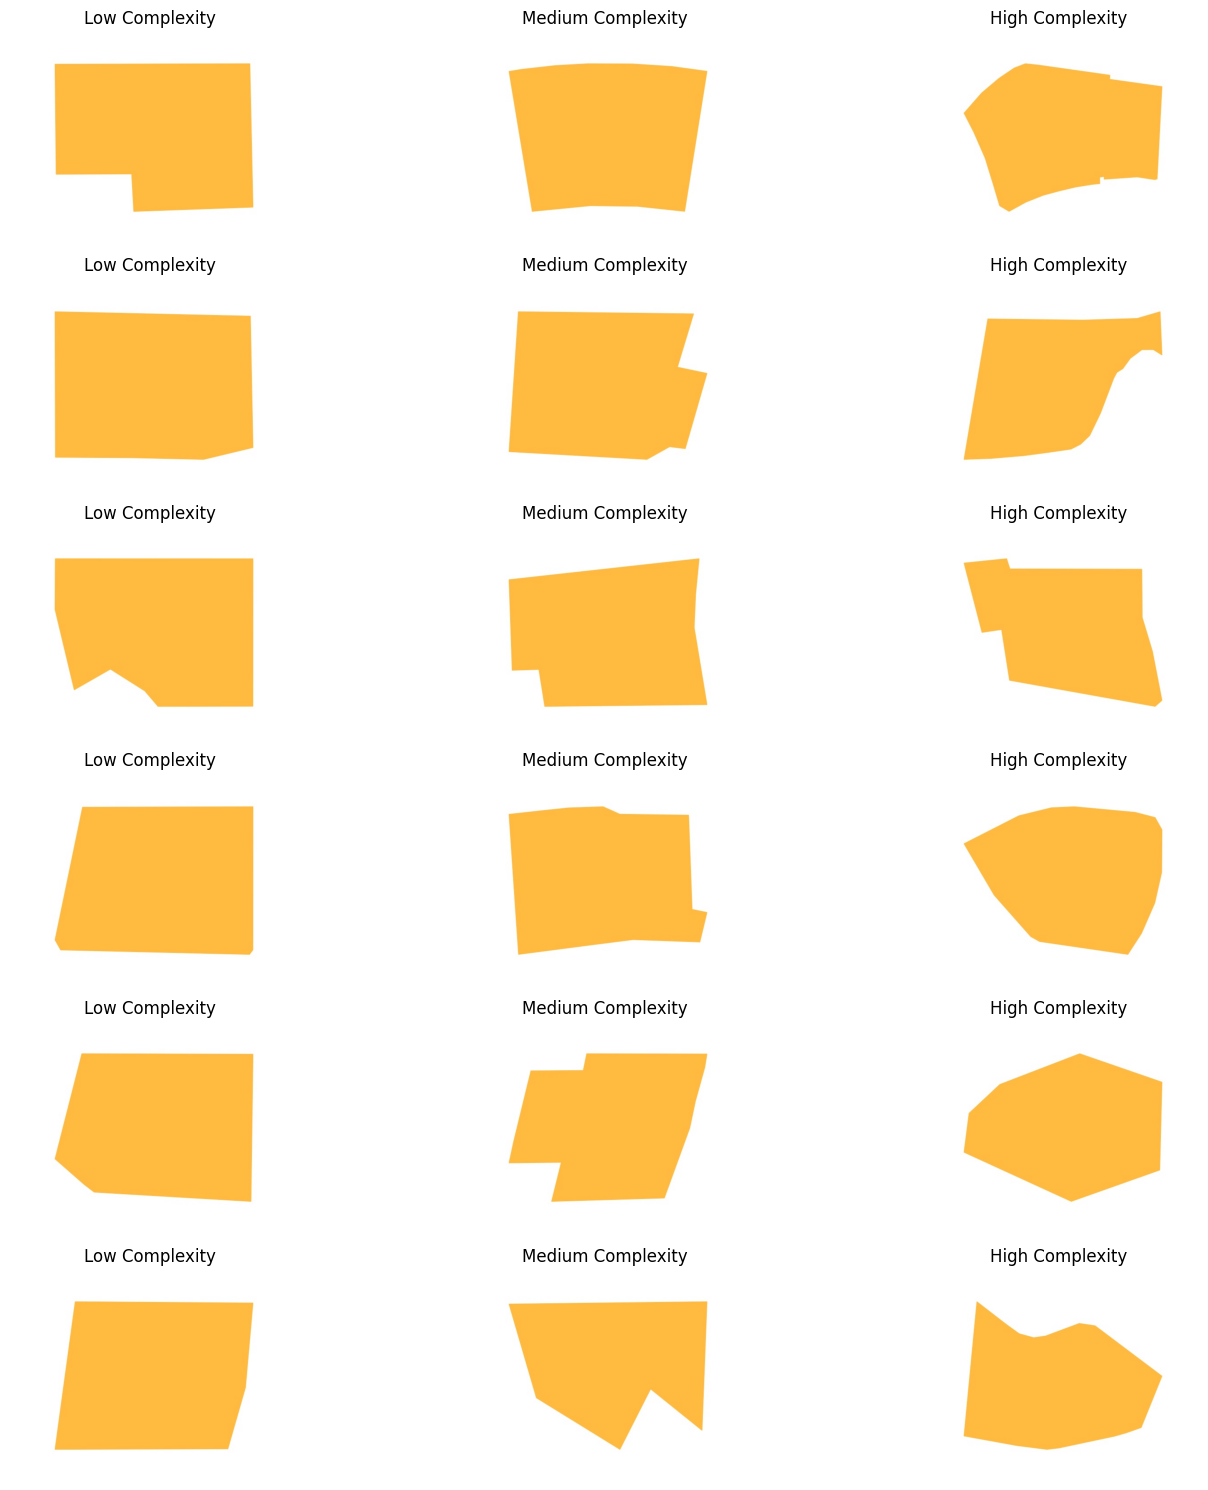

In [139]:
fig, axes = plt.subplots(6, 3, figsize=(15, 15))

# Low Complexity Images
for i, img_path in enumerate(low_complexity[:6]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i, 0].imshow(img)
    axes[i, 0].set_title("Low Complexity")
    axes[i, 0].axis("off")

# Medium Complexity Images
for i, img_path in enumerate(medium_complexity[:6]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i, 1].imshow(img)
    axes[i, 1].set_title("Medium Complexity")
    axes[i, 1].axis("off")

# High Complexity Images
for i, img_path in enumerate(high_complexity[:6]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i, 2].imshow(img)
    axes[i, 2].set_title("High Complexity")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()

In [140]:
complexity_levels = {0: 'Low', 1: 'Medium', 2: 'High'}

In [144]:
specified_area = float(input("Enter the layout area (between 74662.5 and 155531.5 ): "))

In [145]:
specified_complexity_index = int(input("Enter the complexity level (0 for Low, 1 for Medium, 2 for High): "))

In [153]:
contour_df

,Contour File,Contour Area,Number of Vertices,Feature Value,Complexity
0,superimposed_0001.jpg,137254.0,6,0.000044,Medium Complexity
1,superimposed_0002.jpg,133911.0,4,0.000030,Medium Complexity
2,superimposed_0003.jpg,111155.0,5,0.000045,High Complexity
3,superimposed_0004.jpg,104168.0,4,0.000038,Medium Complexity
4,superimposed_0005.jpg,149808.0,4,0.000027,Low Complexity
...,...,...,...,...,...
168,superimposed_0971.jpg,102599.0,4,0.000039,Medium Complexity
169,superimposed_1013.jpg,102875.5,5,0.000049,High Complexity
170,superimposed_1015.jpg,113715.5,6,0.000053,High Complexity
171,superimposed_1043.jpg,146604.0,4,0.000027,Low Complexity


In [156]:
contour_directory

'../out_contour'

In [159]:
image = cv2.imread(image_path)
print(f"Loaded image shape: {image.shape if image is not None else None}")


Loaded image shape: (480, 640, 3)


In [160]:
print(f"Plotting image {i+1} in position {i//3}, {i%3}")


Plotting image 6 in position 1, 2


Loaded image shape: (480, 640, 3)
Plotting image 1 in position 0, 0
Loaded image shape: (480, 640, 3)
Plotting image 2 in position 0, 1
Loaded image shape: (480, 640, 3)
Plotting image 3 in position 0, 2
Loaded image shape: (480, 640, 3)
Plotting image 4 in position 1, 0
Loaded image shape: (480, 640, 3)
Plotting image 5 in position 1, 1
Loaded image shape: (480, 640, 3)
Plotting image 6 in position 1, 2


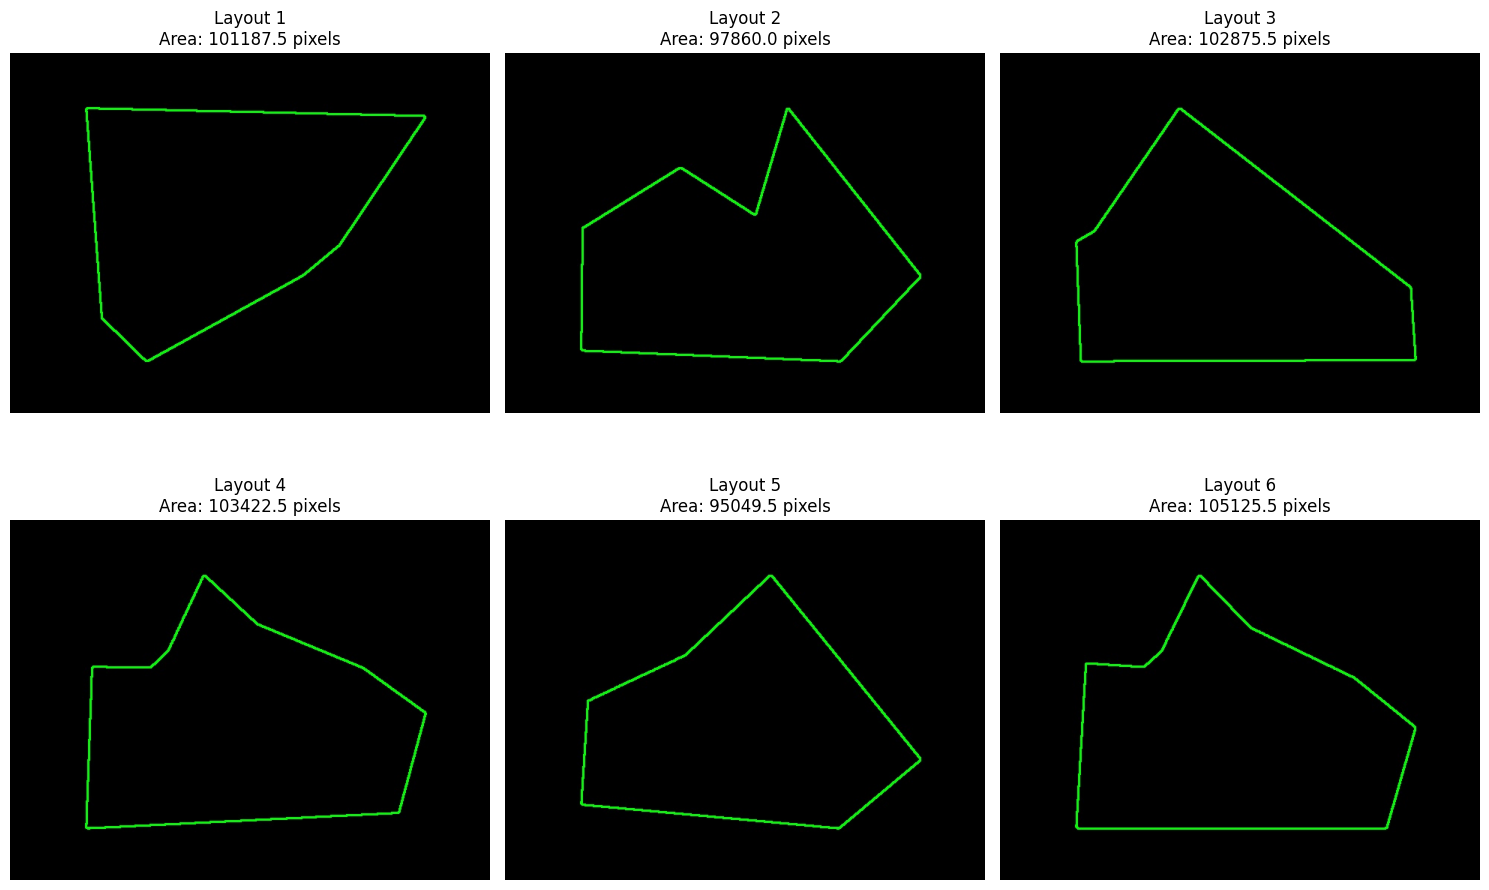

In [163]:
complexity_levels = ['Low Complexity', 'Medium Complexity', 'High Complexity']

# Specify the user inputs
specified_area = 100000
specified_complexity_index = 2  # High Complexity

# Filter data based on specified complexity level
specified_complexity = complexity_levels[specified_complexity_index]
filtered_data = contour_df[contour_df['Complexity'] == specified_complexity]

# Find layouts with areas nearest to specified area
nearest_layouts = filtered_data.iloc[(filtered_data['Contour Area'] - specified_area).abs().argsort()[:6]]

# Display images corresponding to the nearest layouts
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, (_, layout) in enumerate(nearest_layouts.iterrows()):
    image_path = os.path.join(contour_directory, layout['Contour File'])
    image = cv2.imread(image_path)
    print(f"Loaded image shape: {image.shape if image is not None else None}")
    print(f"Plotting image {i+1} in position {i//3}, {i%3}")
    axes[i//3, i%3].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i//3, i%3].set_title(f"Layout {i+1}\nArea: {layout['Contour Area']} pixels")  # Fix typo here
    axes[i//3, i%3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
specified_area = float(input("Enter the layout area: "))
specified_complexity_index = int(input("Enter the complexity level (0 for Low, 1 for Medium, 2 for High): "))